## PCR (Temel Bileşen Regresyonu)

Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon kurulması fikrine dayanır. Elimizde p adet değişken olduğunda p adet değişkenin içerdiği bilginin yüksek bir kısmını ondan daha az sayıda bir bileşen ifade etme düşüncesidir.

#### Model

In [2]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [11]:
# Kategorik değişkenleri dummy değişken formatına dönüştürme
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [12]:
y = df["Salary"]

In [106]:
# Veri seti içinden bağımlı değişkeni ve kategorik değişkenlerin ilk hallerini çıkarma
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")

In [14]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [17]:
# dummy ile birleştirme yaparak bağımsız değişken veri setimizi oluşturma

X =pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


**X:** bağımsız değişkenleri ifade ediyor ve bir Dataframe, **y:** bağımlı değişkenimizi ifade ediyor-Salary değişkeni


In [22]:
# Model Kurrma ve Test-Train olarak ayırma
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

training = df.copy()
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


Sckit-Learn PCR'ın R'da olduğu şekli ile direk uygulamasını barındırmadığı için bunu kendimiz uygulamamız gerekiyor. Buna yöneli olarak ilk önce bir PCA işlemi gerçekleştireceğiz. Ondan sonra bulmuş olduğumuz PCA üzerinde kendimiz bir regresyon modeli oturtup bir PCR uygulaması gerçekleştirmiş olacağız.

Öncelikle verinin ölçeklendirilmesi ve bileşenlerin oluşturulması işlemini ele alacağız. 

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [30]:
# indirgenmiş X anlamında = pca nesnesini dönüştürme ve scale ile ölçeklendirme işlemini X_train üzerinden yapıyoruz
X_reduced_train = pca.fit_transform(scale(X_train))

Şimdi elimizde bizim değişken sayısı kadar bileşen oluşturulmuş fakat aralarındaki bağlantı problemi ortadan kalkmış indirgenmiş bir veri seti var.

In [33]:
# 1.gözlem ve tüm bileşenleri gözlemleme
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [39]:
# Açıklanan varyansı inceleme 
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)* 100) [0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

**Yukarıda ki değerler, bileşenlerin veri setinde bulunan toplam değişkenliğin yani varyansın ne kadarını açıkladığını göstermektedir.** 1.değer 1.bileşenin, 2.değer 1.ve 2.bileşenin birlikte açıkladığı ... şeklinde kümülatif olarak devam etmektedir.

In [107]:
# Tüm bileşenleri kullanarak modeli fit etme işlemi
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [46]:
# Katsayı sabiti
pcr_model.intercept_

543.4834416243655

In [47]:
# Tüm bileşenler için katsayı
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

#### Tahmin

In [50]:
y_pred = pcr_model.predict(X_reduced_train)

In [53]:
# Tahmin edilen değerler
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [55]:
# Train seti için rmse hata hesaplama
np.sqrt(mean_squared_error(y_train,y_pred))

289.32928255649756

In [57]:
r2_score(y_train, y_pred)

0.577007525041018

In [63]:
# Test seti için hata hesaplama
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

In [64]:
y_pred = pcr_model.predict(X_reduced_test)

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.15753641499657

#### Model Tuning

In [69]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)

In [70]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

405.15753641499657


In [72]:
# Kullanıcı dışarıdan farklı bileşen sayısıyla test hatasına bakma
# pcr_model = lm.fit(X_reduced_train[:,0:10],y_train)
## y_pred = pcr_model.predict(X_reduced_test[:,0:10])
## print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


Kullanıcı dışarıdan ayarlamış olduğu birbirinden farklı bileşen sayısı parametresini değiştirdikçe bu durumda birbirinden farklı hatalar elde edilebilmektedir.

In [97]:
# 10 Katlı Cross-Validation yapısı
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits =10,
                              shuffle = True,
                              random_state = 1)

In [91]:
lm = LinearRegression()

In [92]:
RMSE = []

In [93]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1 * model_selection.cross_val_score(lm,
                                                         X_reduced_train[:,:i],
                                                         y_train.ravel(),
                                                         cv = cv_10,
                                                         scoring = "neg_mean_squared_error").mean())
    
    RMSE.append(score)

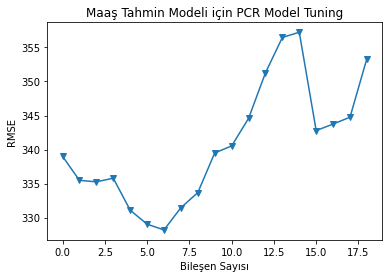

In [95]:
import matplotlib.pyplot as plt
plt.plot(RMSE,'-v')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli için PCR Model Tuning");

Bulduğumuz optimum bileşen değeri ile final modelini oluşturmamız gerekmektedir.

In [98]:
lm = LinearRegression()

In [100]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [102]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [103]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [104]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [105]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233
